# 02 - Exploratory Data Analysis

Explore and validate scraped BaT data before modeling.

**Inputs:**
- `data/raw/bat_listings.parquet`

**Outputs:**
- `data/processed/cleaned_listings.parquet`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from price_analysis.data import clean_listings
from price_analysis.data.cleaning import get_summary_stats, prepare_model_data

logging.basicConfig(level=logging.INFO)
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [2]:
# Paths
DATA_DIR = Path("../data")
RAW_PATH = DATA_DIR / "raw" / "bat_listings.parquet"
PROCESSED_DIR = DATA_DIR / "processed"
PROCESSED_DIR.mkdir(parents=True, exist_ok=True)
OUTPUT_PATH = PROCESSED_DIR / "cleaned_listings.parquet"

## Load Raw Data

In [3]:
df_raw = pd.read_parquet(RAW_PATH)
print(f"Raw data: {len(df_raw)} listings")
display(df_raw.head())

Raw data: 818 listings


,listing_url,title_raw,sale_price,sale_date,model_year,generation,trim,transmission,mileage,color,location
0,https://bringatrailer.com/listing/2019-porsche...,100-Mile Meissen Blue 2019 Porsche 911 Speedster,531000,2025-12-23,2019.0,991.2,None,Manual,100.0,-to-Sample Meissen Blue,"Novato, California 94949"
1,https://bringatrailer.com/listing/1974-porsche...,Twin-Turbocharged 3.0L-Powered 1974 Porsche 91...,77500,2025-12-23,NaN,None,None,Manual,47000.0,Silver,"Houston, Texas 77098"
2,https://bringatrailer.com/listing/1976-porsche...,1976 Porsche 930 Turbo Carrera Project,102000,2025-12-22,NaN,None,Turbo,Manual,21000.0,Grand Prix White,"Rolling Hills Estate, California 90274"
3,https://bringatrailer.com/listing/1984-porsche...,Modified 1984 Porsche 911 Carrera Coupe,58000,2025-12-23,1984.0,None,Carrera,Manual,111000.0,Reed in Guards Red,"Walnut Creek, California 94597"
4,https://bringatrailer.com/listing/1997-porsche...,34k-Mile 1997 Porsche 911 Carrera Cabriolet 6-...,75000,2025-12-22,1997.0,None,Carrera,Manual,34000.0,Ocean Blue Metallic,"Fort Lauderdale, Florida 33311"


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   listing_url   818 non-null    object        
 1   title_raw     818 non-null    object        
 2   sale_price    818 non-null    int64         
 3   sale_date     817 non-null    datetime64[ns]
 4   model_year    790 non-null    float64       
 5   generation    782 non-null    object        
 6   trim          776 non-null    object        
 7   transmission  789 non-null    object        
 8   mileage       788 non-null    float64       
 9   color         746 non-null    object        
 10  location      817 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 70.4+ KB


## Clean and Validate

In [5]:
df = clean_listings(df_raw, drop_invalid=False)
display(df.head())

INFO:price_analysis.data.cleaning:Cleaning 818 listings
ERROR:price_analysis.data.cleaning:Listing https://bringatrailer.com/listing/1974-porsche-911-cabiriolet-conversion/: ['Missing model_year']
ERROR:price_analysis.data.cleaning:Listing https://bringatrailer.com/listing/1976-porsche-930-turbo-carrera-31/: ['Missing model_year']
ERROR:price_analysis.data.cleaning:Listing https://bringatrailer.com/listing/wheels-352/: ['Missing model_year']
ERROR:price_analysis.data.cleaning:Listing https://bringatrailer.com/listing/transaxle-13/: ['Missing model_year']
ERROR:price_analysis.data.cleaning:Listing https://bringatrailer.com/listing/literature-45/: ['Missing model_year']
ERROR:price_analysis.data.cleaning:Listing https://bringatrailer.com/listing/18x8-and-18x12-bbs-motorsport-e88-wheels-for-porsche/: ['Missing model_year']
ERROR:price_analysis.data.cleaning:Listing https://bringatrailer.com/listing/seats-85/: ['Missing model_year']
ERROR:price_analysis.data.cleaning:Listing https://bringa

,listing_url,title_raw,sale_price,sale_date,model_year,generation,trim,transmission,mileage,color,location,sale_year,age,mileage_10k,mileage_scaled,color_category,log_price,is_valid
0,https://bringatrailer.com/listing/2019-porsche...,100-Mile Meissen Blue 2019 Porsche 911 Speedster,531000,2025-12-23,2019,991.2,None,Manual,100,-to-Sample Meissen Blue,"Novato, California 94949",2025.0,6.0,0.01,-1.568805,standard,13.182517,True
1,https://bringatrailer.com/listing/1974-porsche...,Twin-Turbocharged 3.0L-Powered 1974 Porsche 91...,77500,2025-12-23,<NA>,None,None,Manual,47000,Silver,"Houston, Texas 77098",2025.0,<NA>,4.7,-0.281174,standard,11.258033,False
2,https://bringatrailer.com/listing/1976-porsche...,1976 Porsche 930 Turbo Carrera Project,102000,2025-12-22,<NA>,None,Turbo,Manual,21000,Grand Prix White,"Rolling Hills Estate, California 90274",2025.0,<NA>,2.1,-0.994999,standard,11.532728,False
3,https://bringatrailer.com/listing/1984-porsche...,Modified 1984 Porsche 911 Carrera Coupe,58000,2025-12-23,1984,None,Carrera,Manual,111000,Reed in Guards Red,"Walnut Creek, California 94597",2025.0,41.0,11.1,1.475935,special,10.968198,True
4,https://bringatrailer.com/listing/1997-porsche...,34k-Mile 1997 Porsche 911 Carrera Cabriolet 6-...,75000,2025-12-22,1997,None,Carrera,Manual,34000,Ocean Blue Metallic,"Fort Lauderdale, Florida 33311",2025.0,28.0,3.4,-0.638086,standard,11.225243,True


In [6]:
stats = get_summary_stats(df)
print(f"Total listings: {stats['n_listings']}")
print(f"Valid listings: {stats['n_valid']}")
print(f"Date range: {stats['date_range'][0]} to {stats['date_range'][1]}")
print(f"Price range: ${stats['price_range'][0]:,} to ${stats['price_range'][1]:,}")
print(f"Median price: ${stats['price_median']:,}")
print(f"Median mileage: {stats['mileage_median']:,}")

Total listings: 818
Valid listings: 790
Date range: 2024-12-27 00:00:00 to 2025-12-25 00:00:00
Price range: $700 to $876,000
Median price: $49,748.0
Median mileage: 52,000.0


## Missing Data Report

In [7]:
missing = df.isna().sum()
missing_pct = (missing / len(df) * 100).round(1)
missing_report = pd.DataFrame({"missing": missing, "pct": missing_pct})
display(missing_report[missing_report["missing"] > 0].sort_values("missing", ascending=False))

,missing,pct
color,72,8.8
trim,42,5.1
generation,36,4.4
mileage,30,3.7
mileage_10k,30,3.7
mileage_scaled,30,3.7
transmission,29,3.5
age,29,3.5
model_year,28,3.4
sale_date,1,0.1


## Distribution Plots

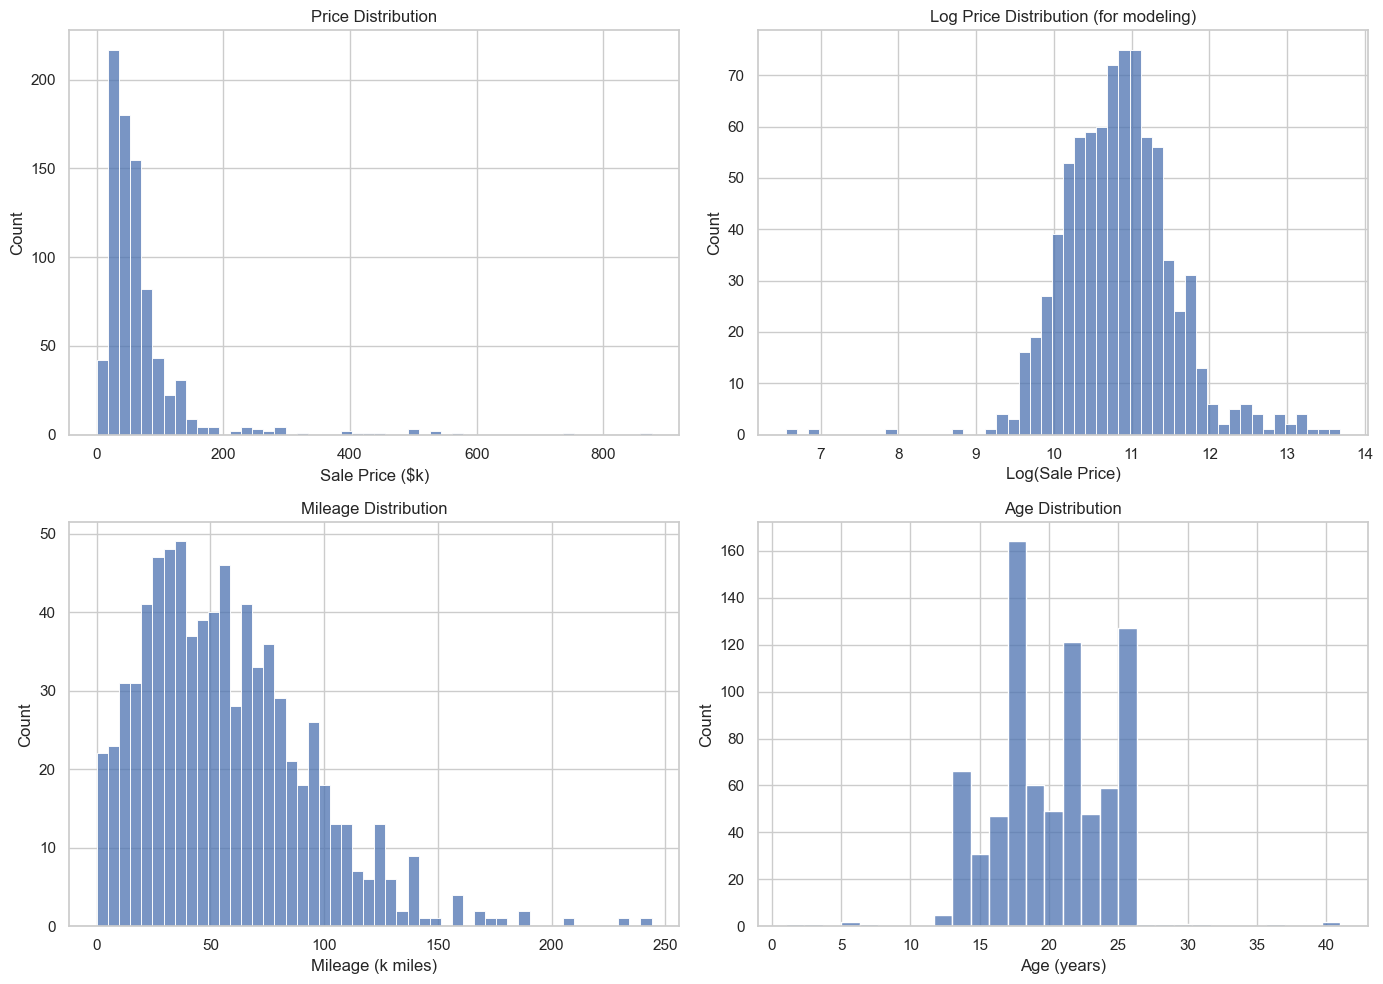

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Price distribution
sns.histplot(df["sale_price"].dropna() / 1000, bins=50, ax=axes[0, 0])
axes[0, 0].set_xlabel("Sale Price ($k)")
axes[0, 0].set_title("Price Distribution")

# Log price distribution
sns.histplot(df["log_price"].dropna(), bins=50, ax=axes[0, 1])
axes[0, 1].set_xlabel("Log(Sale Price)")
axes[0, 1].set_title("Log Price Distribution (for modeling)")

# Mileage distribution
sns.histplot(df["mileage"].dropna() / 1000, bins=50, ax=axes[1, 0])
axes[1, 0].set_xlabel("Mileage (k miles)")
axes[1, 0].set_title("Mileage Distribution")

# Age distribution
sns.histplot(df["age"].dropna(), bins=30, ax=axes[1, 1])
axes[1, 1].set_xlabel("Age (years)")
axes[1, 1].set_title("Age Distribution")

plt.tight_layout()
plt.show()

## Categorical Counts

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


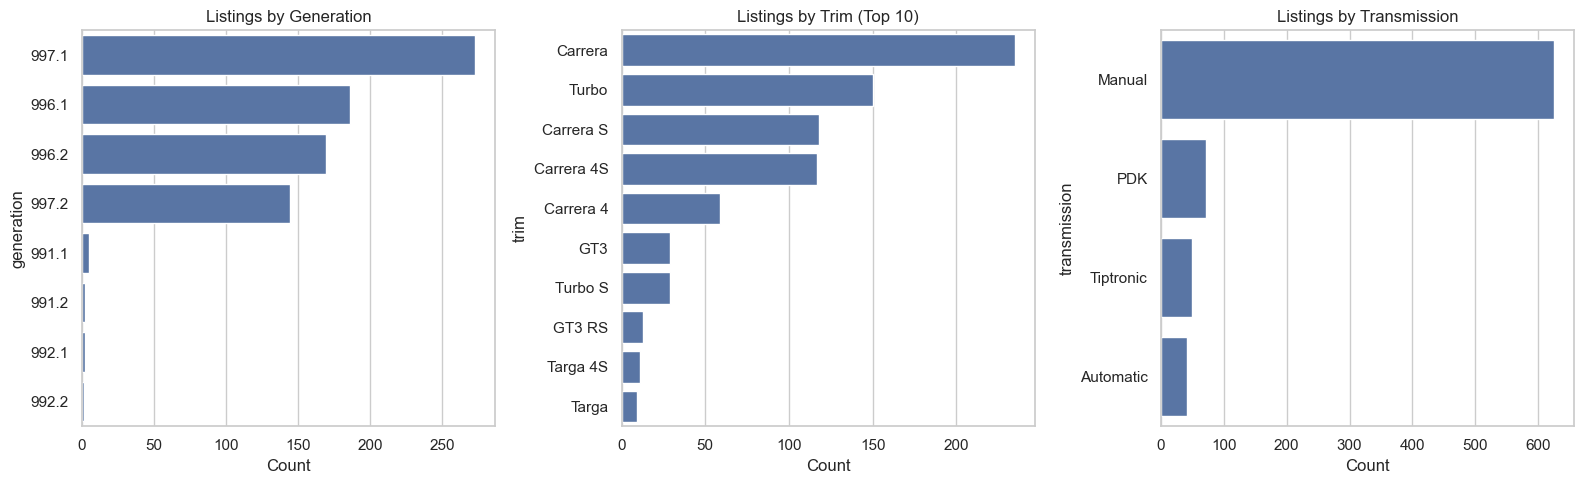

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Generation counts
gen_counts = df["generation"].value_counts()
sns.barplot(x=gen_counts.values, y=gen_counts.index, ax=axes[0], orient="h")
axes[0].set_title("Listings by Generation")
axes[0].set_xlabel("Count")

# Trim counts (top 10)
trim_counts = df["trim"].value_counts().head(10)
sns.barplot(x=trim_counts.values, y=trim_counts.index, ax=axes[1], orient="h")
axes[1].set_title("Listings by Trim (Top 10)")
axes[1].set_xlabel("Count")

# Transmission counts
trans_counts = df["transmission"].value_counts()
sns.barplot(x=trans_counts.values, y=trans_counts.index, ax=axes[2], orient="h")
axes[2].set_title("Listings by Transmission")
axes[2].set_xlabel("Count")

plt.tight_layout()
plt.show()

## Price by Model Year & Sale Date

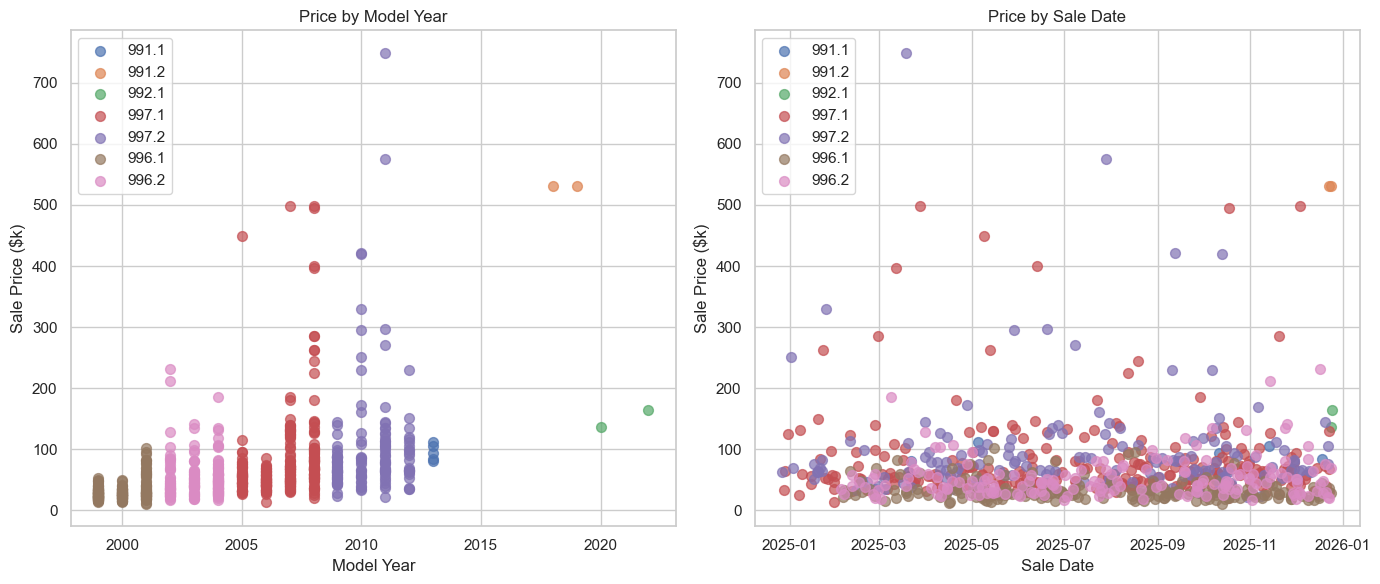

In [10]:
# Focus on key generations
key_gens = ["991.1", "991.2", "992.1", "997.1", "997.2", "996.1", "996.2"]
df_key = df[df["generation"].isin(key_gens)].copy()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Price by model year (scatter)
ax = axes[0]
for gen in key_gens:
    subset = df_key[df_key["generation"] == gen]
    if len(subset) > 0:
        ax.scatter(
            subset["model_year"],
            subset["sale_price"] / 1000,
            label=gen,
            alpha=0.7,
            s=50,
        )
ax.set_xlabel("Model Year")
ax.set_ylabel("Sale Price ($k)")
ax.set_title("Price by Model Year")
ax.legend()

# Price over sale time (if enough data)
ax = axes[1]
has_data = False
for gen in key_gens:
    subset = df_key[df_key["generation"] == gen]
    if len(subset) >= 2:  # Need at least 2 points to show trend
        ax.scatter(
            subset["sale_date"],
            subset["sale_price"] / 1000,
            label=gen,
            alpha=0.7,
            s=50,
        )
        has_data = True

if has_data:
    ax.set_xlabel("Sale Date")
    ax.set_ylabel("Sale Price ($k)")
    ax.set_title("Price by Sale Date")
    ax.legend()
else:
    ax.text(
        0.5,
        0.5,
        "Not enough data for time series",
        ha="center",
        va="center",
        transform=ax.transAxes,
    )
    ax.set_title("Price by Sale Date (insufficient data)")

plt.tight_layout()
plt.show()

## Price by Mileage

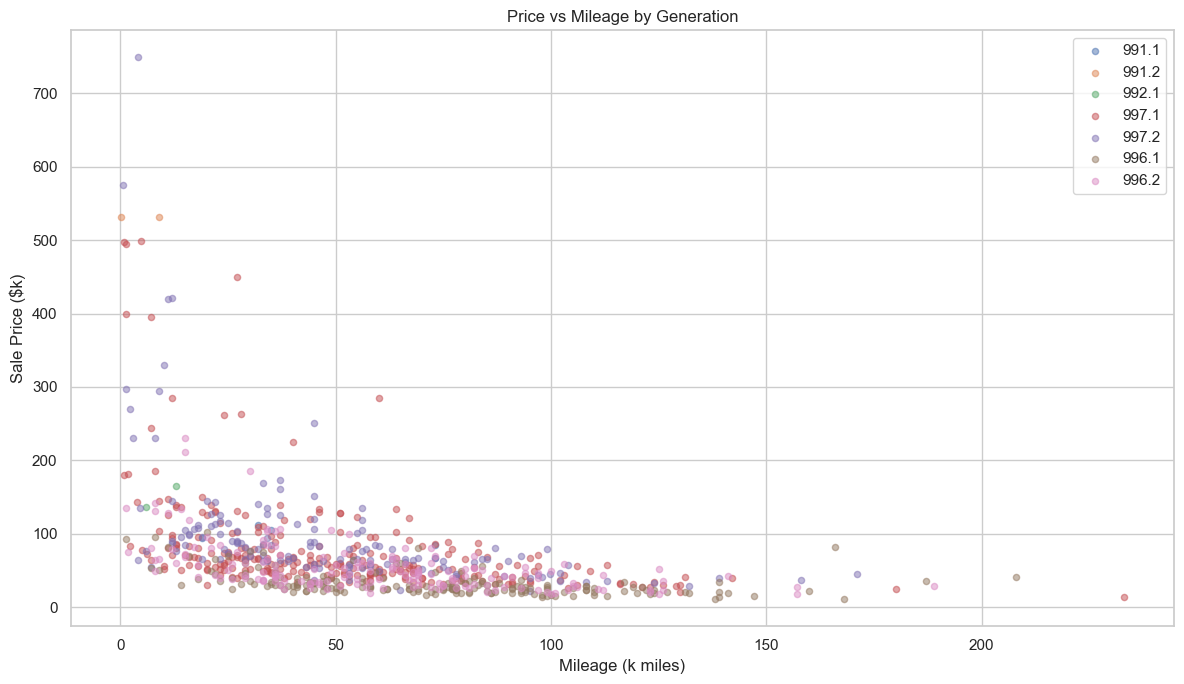

In [11]:
fig, ax = plt.subplots(figsize=(12, 7))
for gen in key_gens:
    subset = df_key[df_key["generation"] == gen]
    ax.scatter(
        subset["mileage"] / 1000,
        subset["sale_price"] / 1000,
        label=gen,
        alpha=0.5,
        s=20,
    )

ax.set_xlabel("Mileage (k miles)")
ax.set_ylabel("Sale Price ($k)")
ax.set_title("Price vs Mileage by Generation")
ax.legend()
plt.tight_layout()
plt.show()

## Manual vs PDK Premium

In [12]:
# Compare manual vs PDK prices
# With small datasets, compare overall (not controlling for generation+trim)
trans_df = df[df["transmission"].isin(["Manual", "PDK"])].copy()

if len(trans_df) > 0:
    # Overall comparison
    print("=== Overall Manual vs PDK ===")
    overall = trans_df.groupby("transmission")["sale_price"].agg(["count", "median", "mean"])
    overall["median"] = overall["median"].apply(lambda x: f"${x:,.0f}")
    overall["mean"] = overall["mean"].apply(lambda x: f"${x:,.0f}")
    display(overall)

    # By generation (if enough data)
    print("\n=== By Generation (where both exist) ===")
    gen_trans = trans_df.groupby(["generation", "transmission"])["sale_price"].agg(
        ["count", "median"]
    )
    gen_trans_wide = gen_trans.unstack("transmission")
    # Only show where we have both Manual and PDK
    gen_trans_wide = gen_trans_wide.dropna()
    if len(gen_trans_wide) > 0:
        display(gen_trans_wide)
    else:
        print("Not enough data - need same generation with both Manual and PDK listings")
else:
    print("No Manual or PDK listings in dataset")

=== Overall Manual vs PDK ===


,count,median,mean
transmission,,,
Manual,626,"$49,500","$69,538"
PDK,72,"$68,000","$90,225"



=== By Generation (where both exist) ===


count          median          
transmission Manual   PDK    Manual       PDK
generation                                   
991.1           1.0   4.0   80000.0  100000.0
991.2           1.0   1.0  531000.0  531111.0
992.1           1.0   1.0  165000.0  137000.0
997.2          74.0  66.0   83000.0   66250.0

## Correlation Matrix

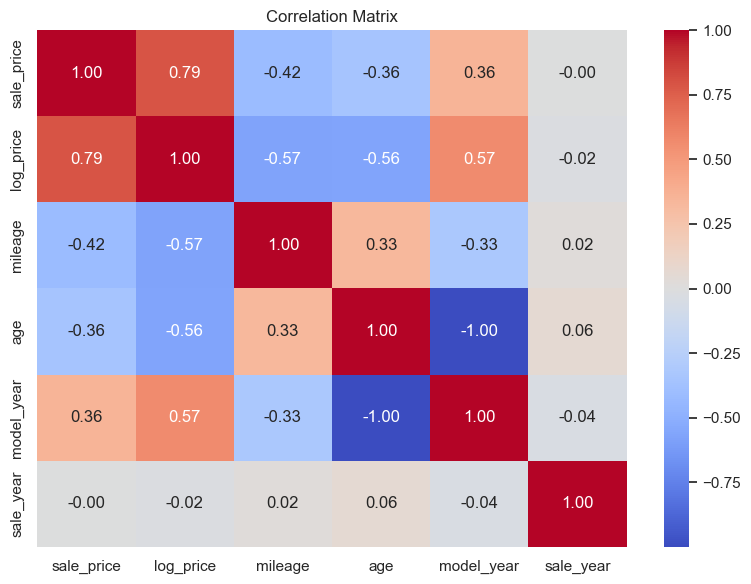

In [13]:
numeric_cols = ["sale_price", "log_price", "mileage", "age", "model_year", "sale_year"]
corr = df[numeric_cols].corr()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, ax=ax)
ax.set_title("Correlation Matrix")
plt.tight_layout()
plt.show()

## Prepare Model-Ready Data

In [14]:
df_model = prepare_model_data(df)
print(f"Model-ready data: {len(df_model)} listings")
display(df_model.head())

INFO:price_analysis.data.cleaning:Model-ready dataset: 756 listings (from 818 cleaned)


Model-ready data: 756 listings


,listing_url,title_raw,sale_price,sale_date,model_year,generation,trim,transmission,mileage,color,location,sale_year,age,mileage_10k,mileage_scaled,color_category,log_price,is_valid
7,https://bringatrailer.com/listing/2020-porsche...,6k-Mile 2020 Porsche 911 Carrera 4S Coupe,137000,2025-12-24,2020,992.1,Carrera 4S,PDK,6000,Aventurine Green Metallic,"Phoenix, Arizona 85018",2025.0,5.0,0.6,-1.406821,standard,11.827736,True
11,https://bringatrailer.com/listing/2024-porsche...,2024 Porsche 911 GT3 Touring 6-Speed,272000,2025-12-23,2024,992.2,GT3 Touring,Manual,3000,Chalk,"Wellesley, Massachusetts 02482",2025.0,1.0,0.3,-1.489186,special,12.513557,True
12,https://bringatrailer.com/listing/2018-porsche...,Signal Green 2018 Porsche 911 GT2 RS Weissach,531111,2025-12-24,2018,991.2,GT2 RS,PDK,9000,-to-Sample Signal Green,"Naperville, Illinois 60563",2025.0,7.0,0.9,-1.324457,special,13.182726,True
14,https://bringatrailer.com/listing/2022-porsche...,2022 Porsche 911 Carrera 4 GTS Cabriolet 7-Speed,165000,2025-12-25,2022,992.1,Carrera 4,Manual,13000,Jet Black Metallic,"Hollis, New York 11423",2025.0,3.0,1.3,-1.214638,standard,12.013701,True
17,https://bringatrailer.com/listing/2002-porsche...,2002 Porsche 911 Turbo Coupe 6-Speed,69000,2025-12-24,2002,996.2,Turbo,Manual,73000,Guards Red,"Frisco, Texas 75036",2025.0,23.0,7.3,0.432652,special,11.141862,True


In [15]:
# Save cleaned data
df.to_parquet(OUTPUT_PATH, index=False)
print(f"Saved cleaned data to {OUTPUT_PATH}")

Saved cleaned data to ../data/processed/cleaned_listings.parquet
